In [81]:
res_path = "C:\\Users\\Geoffroy Leconte\\Documents\\doctorat\\code\\docGL\\amdahl_benchmarks\\results"
using DataFrames, SolverBenchmark, SolverTools, JLD2, Plots

function open_file(path)
    file = jldopen(path, "r")
    df_out = file["stats"]
    close(file)
    return df_out
end

open_file (generic function with 1 method)

In [90]:
fgur3 = jldopen(string(res_path, "\\gurobi_scaling_qp3.jld2"), "r")  # no display
gurobi = fgur3["stats"];
close(fgur3)
fcplex3 = jldopen(string(res_path, "\\cplex_scaling_qp3.jld2"), "r") # maj cplex.jl, single thread 
cplex = fcplex3["stats"];
close(fcplex3)
fxpress2 = jldopen(string(res_path, "\\xpress_scaling_qp2.jld2"), "r")  #tol pdd 1e-8, feas 1e-6
xpress = fxpress2["stats"];
close(fxpress2)

In [91]:
rip_mono = open_file(string(res_path, "\\G-2021-03_qp_mono.jld2"));
rip_mono1 = open_file(string(res_path, "\\ripqp_mono_1_qp.jld2"));
rip_mono2 = open_file(string(res_path, "\\ripqp_mono_2_qp.jld2")); # rm bug simd
rip_mono3 = open_file(string(res_path, "\\ripqp_mono_3_qp.jld2")); # # no scale Q
rip_mono4 = open_file(string(res_path, "\\ripqp_mono_4_qp.jld2")); # scale Q before
rip_mono5 = open_file(string(res_path, "\\ripqp_mono_5_qp.jld2")); # write struct
rip_mono12 = open_file(string(res_path, "\\ripqp_mono_PC_qp.jld2"));
rip_mono_nrtol1 = open_file(string(res_path, "\\ripqp_mono_nrtol_1_qp.jld2"));
rip_mono_d1 = open_file(string(res_path, "\\ripqp_dynamic_1_qp.jld2"));
rip_mono_c1 = open_file(string(res_path, "\\ripqp_ccorr_1_qp.jld2"));
rip_mono_c2 = open_file(string(res_path, "\\ripqp_ccorr_2_qp.jld2")); # ccorr time
rip_mono_c3 = open_file(string(res_path, "\\ripqp_ccorr_3_qp.jld2")); # test ccorr QP1 min 15
rip_mono_c4 = open_file(string(res_path, "\\ripqp_ccorr_4_qp.jld2")); # test ccorr QP min 20
rip_multi1 = open_file(string(res_path, "\\ripqp_multi_1_qp.jld2"));
rip_multi_d1 = open_file(string(res_path, "\\ripqp_multi_dynamic_1_qp.jld2"));

# K2_5
rip_monoK251 = open_file(string(res_path, "\\ripqp_mono_K25_1_qp.jld2"));
rip_mono_dK251 = open_file(string(res_path, "\\ripqp_dynamic_K25_1_qp.jld2"));
rip_multiK251 = open_file(string(res_path, "\\ripqp_multi_K25_1_qp.jld2"));
rip_multi_dK251 = open_file(string(res_path, "\\ripqp_multi_dynamic_K25_1_qp.jld2"));

# K2_5 one step
rip_monoosK251 = open_file(string(res_path, "\\ripqp_mono_osK25_1_qp.jld2")); # r, γ =  T(0.999), T(0.05)
rip_monoosK252 = open_file(string(res_path, "\\ripqp_mono_osK25_2_qp.jld2")); # r, γ =  T(0.95), T(0.1)
rip_monoIPFK21 = open_file(string(res_path, "\\ripqp_mono_IPFK2_1_qp.jld2")); # r, γ =  T(0.999), T(0.05)
rip_monoIPFK22 = open_file(string(res_path, "\\ripqp_mono_IPFK2_2_qp.jld2")); # r, γ =  T(0.95), T(0.1)

# comparisons zoom1
rip_monoK2 = open_file(string(res_path, "\\ripqp_mono_K2_qp.jld2"));
rip_monoK22 = open_file(string(res_path, "\\ripqp_mono_K22_qp.jld2"));
rip_multiK2 = open_file(string(res_path, "\\ripqp_multi_K2_qp.jld2"));
rip_mono_z = open_file(string(res_path, "\\ripqp_mono_z_qp.jld2")); # ϵ_rbz = 1e-5
rip_mono_z2 = open_file(string(res_path, "\\ripqp_mono_z2_qp.jld2")); # ϵ_rbz = 1e-7
rip_multi_z = open_file(string(res_path, "\\ripqp_multi_z_qp.jld2")); # ϵ_pdd32 = 1e-4
rip_multi_z2 = open_file(string(res_path, "\\ripqp_multi_z2_qp.jld2")); # ϵ_pdd32 = 1.0 
rip_mono_r = open_file(string(res_path, "\\ripqp_mono_r_qp.jld2")); # ϵ_rbz = 1e-3
rip_multi_r = open_file(string(res_path, "\\ripqp_multi_r_qp.jld2")); # default multi r
rip_mono_r2 = open_file(string(res_path, "\\ripqp_mono_r2_qp.jld2")); # ref pd
rip_multi_r = open_file(string(res_path, "\\ripqp_multi_r_qp.jld2")); # ϵ_pdd32 = 1e-4
rip_multi_r2 = open_file(string(res_path, "\\ripqp_multi_r2_qp.jld2")); # ϵ_pdd32 = 1.0 
rip_multi_r3 = open_file(string(res_path, "\\ripqp_multi_r3_qp.jld2")); # ϵ_pdd32 = 1.0  ref pd
rip_multi_r4 = open_file(string(res_path, "\\ripqp_multi_r4_qp.jld2")); # ϵ_pdd32 = 1.0  ref pd

# krylov
rip_minres1 = open_file(string(res_path, "\\ripqp_minres_1_qp.jld2")); 

In [92]:
stats_qp = Dict(
#                 :cplex => cplex,
#                 :gurobi => gurobi,
#               :ripqp_mono        => rip_mono,
              :ripqp_mono1       => rip_mono1,
#                 :ripqp_mono12       => rip_mono12,
                :ripqp_mono2       => rip_mono2,
                :ripqp_mono3       => rip_mono3,
                :ripqp_mono4       => rip_mono4,
#                 :ripqp_mono5       => rip_mono5,
                # :ripqp_mono_nrtol1 => rip_mono_nrtol1,
#               :ripqp_mono_d1   => rip_mono_d1,
#                 :ripqp_mono_c1   => rip_mono_c1,
#                 :ripqp_mono_c2   => rip_mono_c2,
#                 :ripqp_mono_c3   => rip_mono_c3,
#                 :ripqp_mono_c4   => rip_mono_c4,
#               :rip_monoK251    => rip_monoK251,
#               :rip_mono_dK251  => rip_mono_dK251,
#                 :rip_monoK2      => rip_monoK2,
#                 :rip_monoK22     => rip_monoK22,
#                 :rip_mono_z      => rip_mono_z,
#                 :rip_mono_z2      => rip_mono_z2,
#                 :rip_mono_r      => rip_mono_r,
#                 :rip_mono_r2      => rip_mono_r2,
#                  :rip_minres1 => rip_minres1,
               )

Dict{Symbol, DataFrame} with 4 entries:
  :ripqp_mono1 => 123×32 typename(DataFrame). Omitted printing of 25 columns…
  :ripqp_mono3 => 123×32 typename(DataFrame). Omitted printing of 25 columns…
  :ripqp_mono4 => 123×32 typename(DataFrame). Omitted printing of 25 columns…
  :ripqp_mono2 => 123×32 typename(DataFrame). Omitted printing of 25 columns…

In [93]:
# using Query, Statistics
# q1 = @from i in stats_qp[:ripqp_mono_c3] begin
#             @where i.nvar <= 100
#             @select i.nvar
#             @collect
#        end
# length(q1)

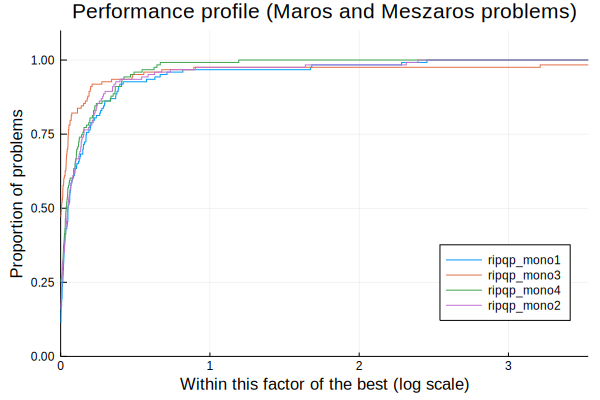

In [94]:
cost = df -> df.elapsed_time + (df.status .!= :acceptable) * Inf #+ (df.elapsed_time .> 0.1) * Inf 
perf = performance_profile(stats_qp, cost )
plot!(perf, legend=:bottomright)
title!("Performance profile (Maros and Meszaros problems)")

In [7]:
rip_mono1bis = copy(rip_mono1);
rip_mono1bis.iter .*= 2;

stats_it = Dict(
                :rip_mono1   => rip_mono1bis,
#                 :rip_monoosK251 => rip_monoosK251,
#                 :rip_monoosK252 => rip_monoosK252,
                :rip_monoIPFK21 => rip_monoIPFK21,
                :rip_monoIPFK22 => rip_monoIPFK22
                )

Dict{Symbol, DataFrame} with 3 entries:
  :rip_mono1      => 123×32 typename(DataFrame). Omitted printing of 25 columns…
  :rip_monoIPFK21 => 123×31 typename(DataFrame). Omitted printing of 24 columns…
  :rip_monoIPFK22 => 123×31 typename(DataFrame). Omitted printing of 24 columns…

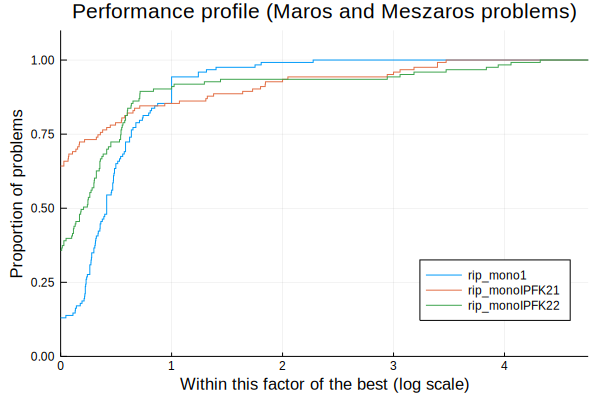

In [16]:
perf2 = performance_profile(stats_it, df->df.iter)
plot!(perf2, legend=:bottomright)
title!("Performance profile (Maros and Meszaros problems)")

In [17]:
# stats multi
stats_qp = Dict(
#                 :rip_multiK2      => rip_multiK2,
#                 :rip_monoK2       => rip_monoK2,
                :rip_multi_z      => rip_multi_z,
#                 :rip_multi_z2      => rip_multi_z2,
                :rip_multi_r      => rip_multi_r,
#                 :rip_multi_r2      => rip_multi_r2,
#                 :rip_multi_r3      => rip_multi_r3,
#                 :rip_multi_r4      => rip_multi_r4,
               )

Dict{Symbol,DataFrame} with 2 entries:
  :rip_multi_r => 123×31 DataFrame. Omitted printing of 24 columns…
  :rip_multi_z => 123×31 DataFrame. Omitted printing of 24 columns…

┌ Warning: some measures are zero; shifting all by one
└ @ BenchmarkProfiles C:\Users\Geoffroy Leconte\.julia\packages\BenchmarkProfiles\xB4CX\src\performance_profiles.jl:15


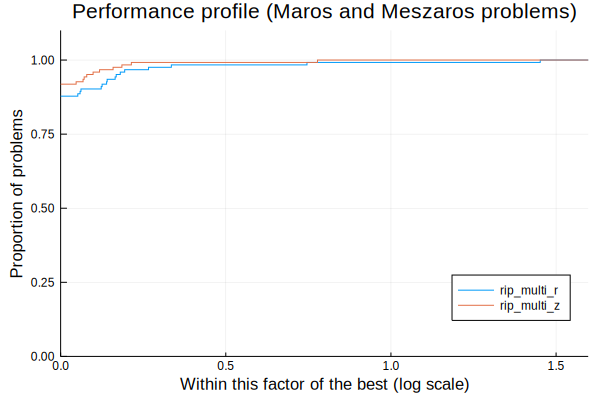

In [18]:
perf = performance_profile(stats_qp, df->df.iter)
plot!(perf, legend=:bottomright)
title!("Performance profile (Maros and Meszaros problems)")

In [31]:
withenv("COLUMNS" => 400, "LINES" => 200) do
    display(rip_mono3)
end

,id,name,nvar,ncon,nequ,status,objective,elapsed_time,iter,dual_feas,primal_feas,neval_obj,neval_grad,neval_cons,neval_jcon,neval_jgrad,neval_jac,neval_jprod,neval_jtprod,neval_hess,neval_hprod,neval_jhess,neval_jhprod,neval_residual,neval_jac_residual,neval_jprod_residual,neval_jtprod_residual,neval_hess_residual,neval_jhess_residual,neval_hprod_residual
,Int64,String,Int64,Int64,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,AUG2D,20200,10000,0,acceptable,1.68741e6,0.201969,20,2.13163e-13,5.30687e-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,AUG2DC,20200,10000,0,acceptable,1.81837e6,0.202501,20,2.6823e-13,6.84242e-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,AUG2DCQP,20200,10000,0,acceptable,6.49813e6,0.488187,48,1.54584e-5,4.8459e-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,AUG2DQP,20200,10000,0,acceptable,6.23701e6,0.444011,48,1.94328e-5,7.13873e-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5,AUG3D,3873,1000,0,acceptable,554.068,0.022011,12,3.85196e-11,5.78735e-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6,AUG3DC,3873,1000,0,acceptable,771.262,0.022151,12,6.67985e-11,1.46123e-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7,AUG3DCQP,3873,1000,0,acceptable,993.362,0.068228,48,4.38562e-8,2.66454e-14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,8,AUG3DQP,3873,1000,0,acceptable,675.238,0.067384,48,1.33227e-15,3.9968e-15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,9,BOYD1,93261,18,0,acceptable,-6.17352e7,3.041,120,0.00586488,0.0141602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
